# WP2.4 - Short circuit on three-phase grids with generators and nominal current

This Notebook shows exemplary tests that are implemented in the sce_test/test_sce.py file.

Therefore it must be run in an environment where the pandapower test folders can be found by the jupyter server's python environment. This can be done by checking out the git branche sce in pandapower and locally initializing the repository by using `pip install -e .`.

Further information on running short-circuit calculations in pandapower can be found in the [documentation on shortcircuit](https://pandapower.readthedocs.io/en/latest/shortcircuit/run.html) and the [shortcircuit tutorial](https://github.com/e2nIEE/pandapower/blob/sce/tutorials/shortcircuit/shortcircuit.ipynb).


In [1]:
import os
from pandapower import pp_dir
from pandapower.plotting import simple_plot, create_generic_coordinates, set_line_geodata_from_bus_geodata
from pandapower.test.shortcircuit.sce_tests.functions_tests import load_test_case, load_test_case_data, run_test_cases, compare_results

testfiles_path = os.path.join(pp_dir, 'test', 'shortcircuit', 'sce_tests')

def plot(net):
    create_generic_coordinates(net, overwrite=True)
    set_line_geodata_from_bus_geodata(net, overwrite=True)

    simple_plot(
        net,
        line_width=5.,
        plot_loads=True, plot_gens=True, plot_sgens=True,
        load_size=3., gen_size=3., sgen_size=3., ext_grid_size=1.5
    )

load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\re2.dll...
load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\highs.dll...
load C:\Users\lriedl\miniconda3\envs\env_sce\Lib\site-packages\ortools\.libs\ortools.dll...


## Test Case 1: Four bus radial grid with generator

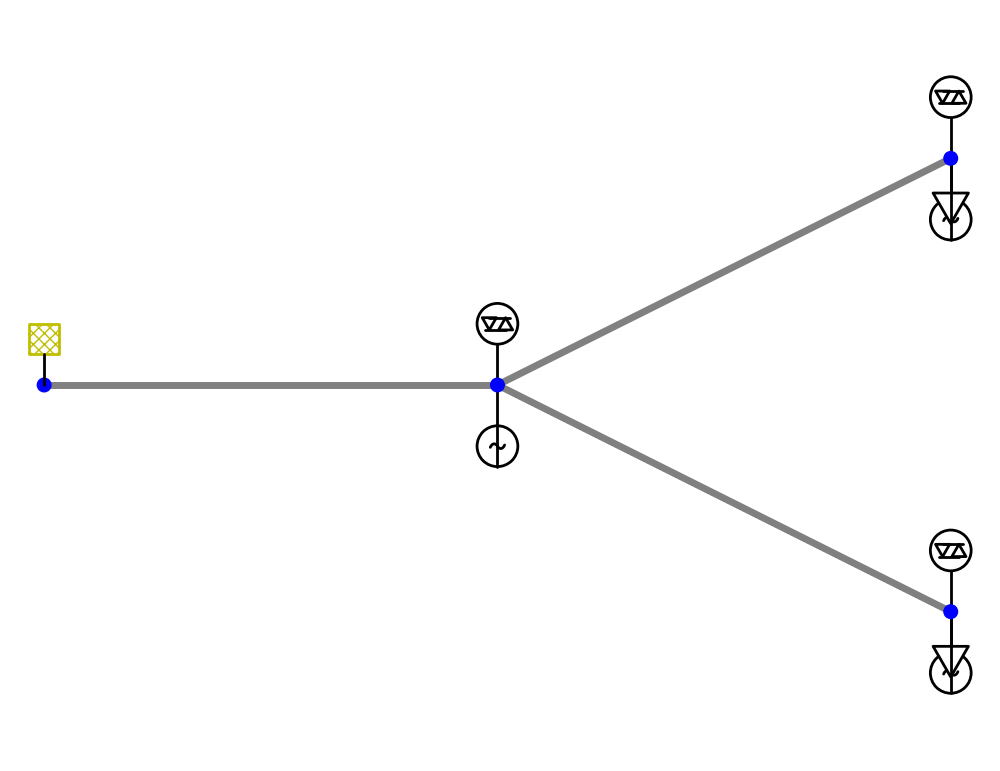

In [2]:
net_name = "1_four_bus_radial_grid_gen"

fault = "LLL"
case = "max"
fault_values = (0.0, 0.0)
# lv_tol_percents does not influence max case (default value is 10)
lv_tol_percents = 10
fault_location_bus = 0
is_branch_test = True
gen_idx = 1
# vector group not necesarry as the grid does not contain a transformer
bus_or_branch = "branch" if is_branch_test else "bus"

net, dataframes = load_test_case_data(net_name, fault_location_bus, gen_idx=gen_idx, gen_mode='gen')

plot(net)

With the network and expected results loaded, we now can run the test to receive the dataframes and the columns that should be compared.

Below is the list of columns that will be compared.

In [3]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['name', 'ikss_ka', 'ikss_a_from_ka', 'ikss_a_from_degree',
       'ikss_a_to_ka', 'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar',
       'p_a_to_mw', 'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree',
       'vm_a_to_pu', 'va_a_to_degree'],
      dtype='object')

In [4]:
net_df[columns_to_check]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.786346,0.786346,107.864671,0.786346,-72.135329,0.0,0.0,0.96461,1.094461,0.000000,0.000000,0.053557,-23.526861
1,Line_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.053557,-23.526861,0.053557,-23.526861
2,Line_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.053557,-23.526861,0.053557,-23.526861


In [5]:
pf_results[columns_to_check]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.786346,0.786346,107.864671,0.786346,-72.135329,-1.000000e-07,-1.000000e-07,0.96461,1.094461,0.000000,0.000000,0.053557,-23.526861
1,Line_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.053557,-23.526861,0.053557,-23.526861
2,Line_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.053557,-23.526861,0.053557,-23.526861


These are all the test results that were exported from PowerFactory. Depending on the parameter combination, the corresponding dataframe is selected.

In [6]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.786346,0.786346,107.864671,0.786346,-72.135329,-1.000000e-07,-1.000000e-07,0.96461,1.094461,0.000000,0.000000,0.053557,-23.526861
1,Line_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.053557,-23.526861,0.053557,-23.526861
2,Line_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.053557,-23.526861,0.053557,-23.526861


As you can see the results are matching and the comparison function will pass and not throw any errors.

In [7]:
compare_results(columns_to_check, net_df, pf_results)

Similarly tests can be run for bus faults.

In [8]:
is_branch_test = False
bus_or_branch = "branch" if is_branch_test else "bus"
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['name', 'ikss_ka', 'skss_mw', 'rk_ohm', 'xk_ohm'], dtype='object')

In [9]:
net_df[columns_to_check]

,name,ikss_ka,skss_mw,rk_ohm,xk_ohm
0,Bus_0,3.659218,126.759036,0.501309,3.434762


In [10]:
pf_results[columns_to_check]

,name,ikss_ka,skss_mw,rk_ohm,xk_ohm
0,Bus_0,3.659218,126.759042,0.501309,3.434762


In [11]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_ka,skss_mw,rk_ohm,xk_ohm
0,Bus_0,3.659218,126.759042,0.501309,3.434762
1,Bus_1,0.000000,0.000000,0.000000,0.000000
2,Bus_2,0.000000,0.000000,0.000000,0.000000
3,Bus_3,0.000000,0.000000,0.000000,0.000000


In [12]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 2: Five bus radial grid with generator

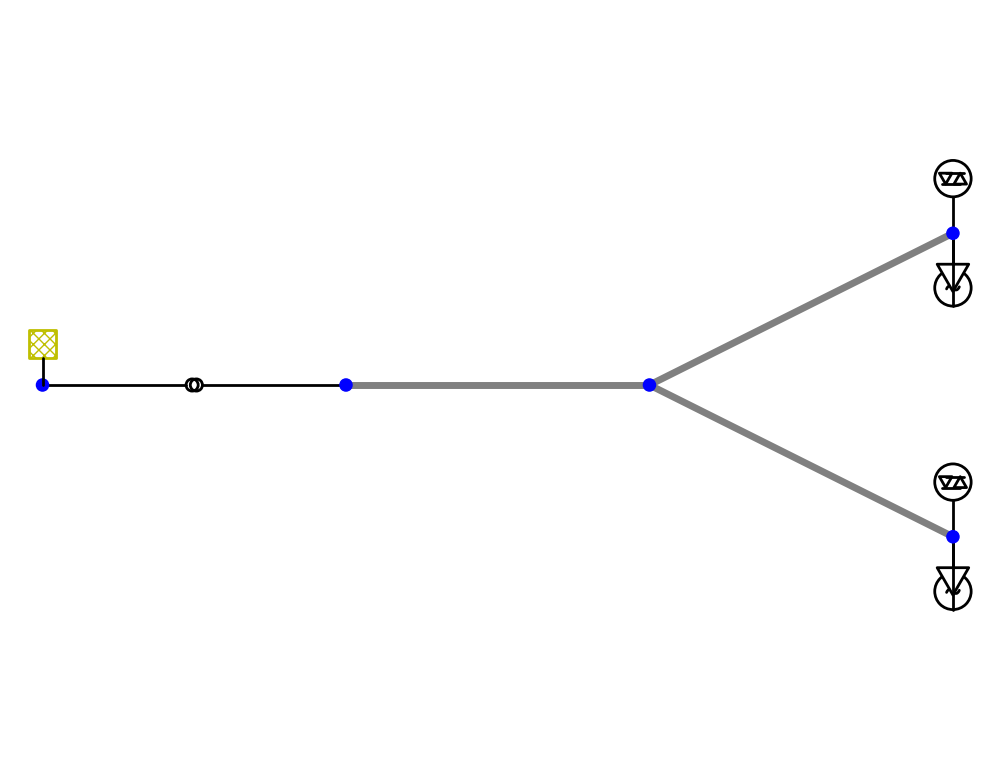

In [13]:
net_name = "2_five_bus_radial_grid"

fault = "LL"
case = "min"
fault_values = (5.0, 5.0)
lv_tol_percents = 6
fault_location_bus = 1
is_branch_test = True
gen_idx = [3, 4]
vector_group = 'Dyn'

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, gen_idx=gen_idx, gen_mode='gen')

plot(net)

In [14]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [15]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.053172,-155.590458,0.053172,24.409542,-0.559422,0.246897,0.562244,-0.245229,0.995939,0.595554,...,0.398302,44.230361,-0.651377,-3.039838,0.809768,3.133438,0.675953,122.135899,0.703684,119.740542
1,0.026586,24.409542,0.026586,-155.590458,0.281828,-0.122198,-0.281122,0.122615,1.000624,0.968478,...,0.199151,-135.769639,0.444482,1.590119,-0.404884,-1.566719,0.717983,118.613229,0.703684,119.740542
2,0.026586,24.409542,0.026586,-155.590458,0.281828,-0.122198,-0.281122,0.122615,1.000624,0.968478,...,0.199151,-135.769639,0.444482,1.590119,-0.404884,-1.566719,0.717983,118.613229,0.703684,119.740542


In [16]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.053172,-155.590458,0.053172,24.409542,-0.559422,0.246897,0.562244,-0.245229,0.995939,0.595554,...,0.398302,44.230361,-0.651377,-3.039838,0.809768,3.133438,0.675953,122.135899,0.703684,119.740542
1,0.026586,24.409542,0.026586,-155.590458,0.281828,-0.122198,-0.281122,0.122615,1.000624,0.968478,...,0.199151,-135.769639,0.444482,1.590119,-0.404884,-1.566719,0.717983,118.613229,0.703684,119.740542
2,0.026586,24.409542,0.026586,-155.590458,0.281828,-0.122198,-0.281122,0.122615,1.000624,0.968478,...,0.199151,-135.769639,0.444482,1.590119,-0.404884,-1.566719,0.717983,118.613229,0.703684,119.740542


In [17]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,1.442870,1.442870,109.908371,1.442870,-70.091629,-1.000000e-07,-1.000000e-07,3.247722,3.684915,0.000000,0.00000,0.098271,-21.48316
1,Line_1,0.721435,0.721435,-70.091629,0.721435,109.908371,2.435791e+00,2.763686e+00,-1.623861,-1.842457,0.147407,-21.48316,0.098271,-21.48316
2,Line_2,0.721435,0.721435,-70.091629,0.721435,109.908371,2.435791e+00,2.763686e+00,-1.623861,-1.842457,0.147407,-21.48316,0.098271,-21.48316


In [18]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 3: Five bus meshed grid with generator

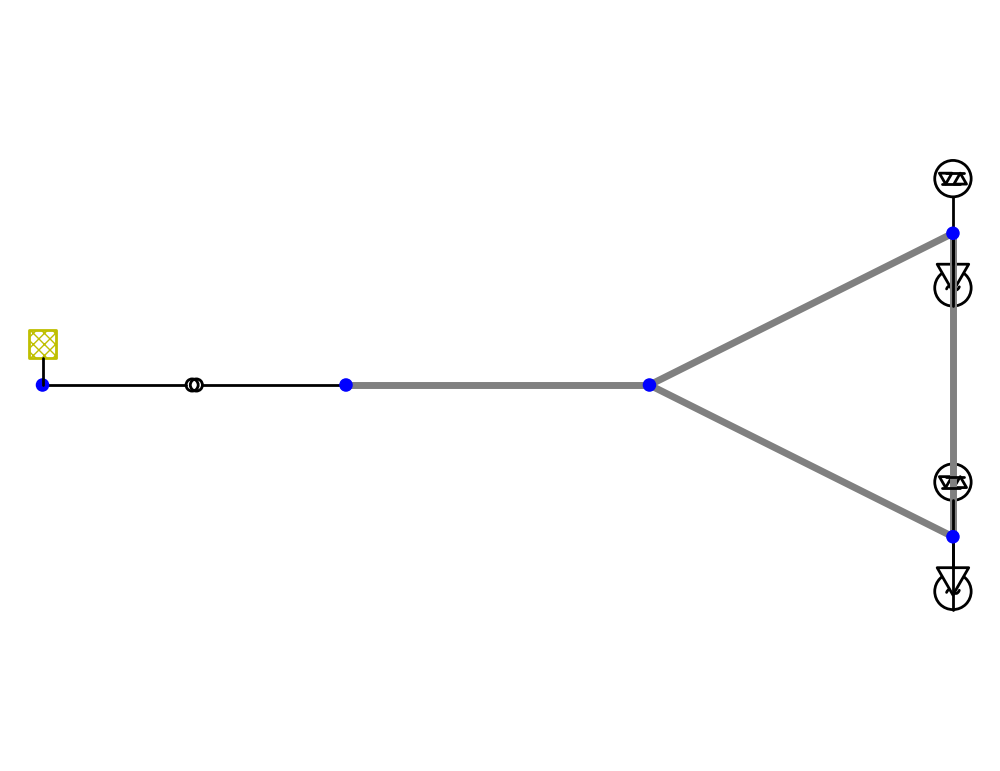

In [19]:
net_name = "3_five_bus_meshed_grid"

fault = "LLG"
case = "min"
fault_values = (5.0, 5.0)
lv_tol_percents = 6
fault_location_bus = 2
is_branch_test = True
gen_idx = [3, 4]
vector_group = 'Yyn'

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, gen_idx=gen_idx, gen_mode='gen')

plot(net)

In [20]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [21]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.192341,-52.331377,0.193025,127.563817,1.479395,1.965002,-1.485275,-1.941691,1.107465,0.693556,...,0.815459,-129.310981,4.361755,6.396396,-3.605488,-5.843403,0.821708,106.439777,0.729199,109.013662
1,0.097114,127.459226,0.096512,-52.436183,-0.646280,-0.950435,0.742638,0.970846,1.024946,3.244161,...,0.219741,-90.668869,1.925100,0.816973,-1.742132,-0.623174,0.822020,112.387057,0.729199,109.013662
2,0.097114,127.459226,0.096512,-52.436183,-0.646280,-0.950435,0.742638,0.970846,1.024946,3.244161,...,0.219741,-90.668869,1.925100,0.816973,-1.742132,-0.623174,0.822020,112.387057,0.729199,109.013662
3,0.000266,133.175815,0.000266,133.175815,-0.002022,-0.002416,-0.002022,-0.002416,1.024946,3.244161,...,0.000266,133.175815,0.002362,-0.000897,0.002362,-0.000897,0.822020,112.387057,0.822020,112.387057


In [22]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.192341,-52.331377,0.193025,127.563817,1.479395,1.965002,-1.485275,-1.941691,1.107465,0.693556,...,0.815459,-129.310980,4.361755,6.396396,-3.605488,-5.843403,0.821708,106.439777,0.729199,109.013662
1,0.097114,127.459226,0.096512,-52.436183,-0.646280,-0.950435,0.742638,0.970846,1.024946,3.244161,...,0.219741,-90.668869,1.925100,0.816973,-1.742132,-0.623174,0.822020,112.387057,0.729199,109.013662
2,0.097114,127.459226,0.096512,-52.436183,-0.646280,-0.950435,0.742638,0.970846,1.024946,3.244161,...,0.219741,-90.668869,1.925100,0.816973,-1.742132,-0.623174,0.822020,112.387057,0.729199,109.013662
3,0.000266,133.175815,0.000266,133.175815,-0.002022,-0.002416,-0.002022,-0.002416,1.024946,3.244161,...,0.000266,133.175815,0.002362,-0.000897,0.002362,-0.000897,0.822020,112.387057,0.822020,112.387057


In [23]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,4.282963,4.282963,-77.779846,4.282963,102.220154,28.61628,32.468471,-1.000000e-07,-1.000000e-07,0.291706,-29.171377,0.000000,0.000000
1,Line_1,0.786346,0.786346,-72.135329,0.786346,107.864671,0.96461,1.094461,-1.000000e-07,-1.000000e-07,0.053557,-23.526861,0.000000,0.000000
2,Line_2,0.786346,0.786346,-72.135329,0.786346,107.864671,0.96461,1.094461,-1.000000e-07,-1.000000e-07,0.053557,-23.526861,0.000000,0.000000
3,Line_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.053557,-23.526861,0.053557,-23.526861


In [24]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 4: Twenty bus radial grid with generator

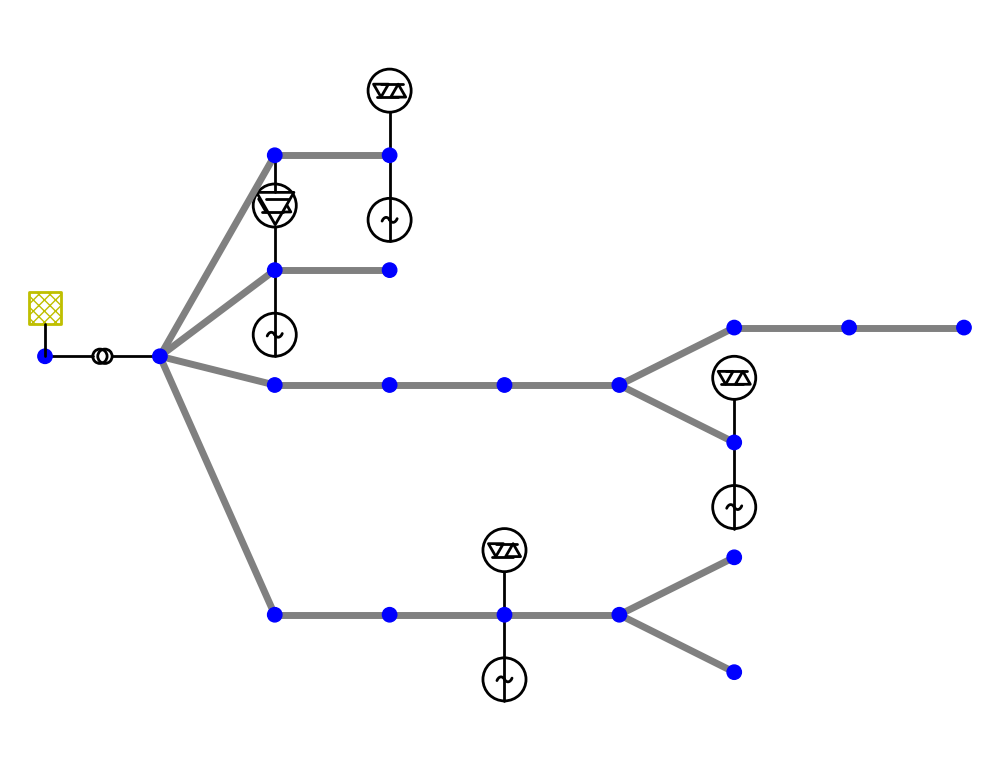

In [25]:
net_name = "4_twenty_bus_radial_grid"

fault = "LG"
case = "max"
fault_values = (0.0, 0.0)
lv_tol_percents = 10
fault_location_bus = 8
is_branch_test = True
gen_idx = [4, 7, 14, 19]
vector_group = "YNyn"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, gen_idx=gen_idx, gen_mode='gen')

plot(net)

In [26]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [27]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,2.667889,-65.663284,2.667889,114.336716,0.261835,0.497444,-0.202107,-0.379415,0.912394,-3.423862,...,0.057521,117.159593,-0.014653,-0.000284,0.014414,-0.000162,1.103283,118.268138,1.085134,116.516006
10,0.122948,115.598173,0.122948,-64.401828,-0.012803,-0.023168,0.012920,0.023425,0.932242,-3.327685,...,0.011808,176.910488,-0.001579,0.002565,0.001586,-0.002563,1.104613,118.527717,1.105287,118.657270
11,0.122948,115.598172,0.122948,-64.401830,-0.012920,-0.023425,0.013037,0.023682,0.942167,-3.281116,...,0.011808,176.910546,-0.001586,0.002563,0.001593,-0.002561,1.105287,118.657270,1.105966,118.786666
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952092,-3.235519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.105966,118.786666,1.105966,118.786666
13,0.122948,115.598167,0.122948,-64.401834,-0.013037,-0.023682,0.013155,0.023939,0.952092,-3.235519,...,0.011808,176.910767,-0.001593,0.002561,0.001599,-0.002559,1.105966,118.786666,1.106650,118.915901
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952092,-3.235519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.105966,118.786666,1.105966,118.786666
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952092,-3.235519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.105966,118.786666,1.105966,118.786666
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.924708,-3.410415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.104503,118.436663,1.104503,118.436663
17,0.143396,112.977696,0.143397,-67.022305,-0.013594,-0.027414,0.013753,0.027765,0.924018,-3.398431,...,0.014952,166.590126,-0.002543,0.002841,0.002554,-0.002837,1.104320,118.425411,1.105366,118.582387
1,0.122948,115.598177,0.122948,-64.401825,-0.012568,-0.022653,0.012686,0.022910,0.912394,-3.423862,...,0.011808,176.910363,-0.001566,0.002569,0.001572,-0.002567,1.103283,118.268138,1.103945,118.398005


In [28]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,2.667889,-65.663284,2.667889,114.336716,2.618353e-01,4.974443e-01,-2.021066e-01,-3.794148e-01,0.912394,-3.423861,...,0.057521,117.159604,-1.465321e-02,-2.835415e-04,1.441394e-02,-1.619171e-04,1.103283,118.268138,1.085134,116.516007
1,0.122948,115.598178,0.122948,-64.401824,-1.280282e-02,-2.316755e-02,1.292009e-02,2.342471e-02,0.932242,-3.327685,...,0.011808,176.910496,-1.579192e-03,2.565206e-03,1.585951e-03,-2.563191e-03,1.104613,118.527717,1.105287,118.657270
2,0.122948,115.598175,0.122948,-64.401826,-1.292009e-02,-2.342471e-02,1.303736e-02,2.368187e-02,0.942167,-3.281116,...,0.011808,176.910552,-1.585951e-03,2.563191e-03,1.592711e-03,-2.561176e-03,1.105287,118.657270,1.105966,118.786666
3,0.000000,0.000000,0.000000,0.000000,7.814626e-10,8.225400e-09,-1.074921e-11,-5.700337e-09,0.952092,-3.235518,...,0.000000,0.000000,-8.809133e-09,-2.105371e-09,5.847563e-09,1.309125e-09,1.105966,118.786666,1.105966,118.786666
4,0.122948,115.598166,0.122948,-64.401835,-1.303736e-02,-2.368188e-02,1.315463e-02,2.393904e-02,0.952092,-3.235518,...,0.011808,176.910768,-1.592702e-03,2.561178e-03,1.599462e-03,-2.559164e-03,1.105966,118.786666,1.106650,118.915901
5,0.000000,0.000000,0.000000,0.000000,5.209751e-10,5.483600e-09,2.497382e-10,-2.958537e-09,0.952092,-3.235518,...,0.000000,0.000000,-5.872755e-09,-1.403581e-09,2.911185e-09,6.073342e-10,1.105966,118.786666,1.105966,118.786666
6,0.000000,0.000000,0.000000,0.000000,2.604876e-10,2.741800e-09,5.102257e-10,-2.167374e-10,0.952092,-3.235518,...,0.000000,0.000000,-2.936378e-09,-7.017905e-10,-2.519217e-11,-9.445633e-11,1.105966,118.786666,1.105966,118.786666
7,0.000000,0.000000,0.000000,0.000000,1.250611e-10,3.098773e-09,5.877395e-10,-2.218691e-10,0.924708,-3.410415,...,0.000000,0.000000,-3.348321e-09,-9.684026e-10,-1.989558e-11,-1.215366e-10,1.104503,118.436663,1.104503,118.436663
8,0.143396,112.977696,0.143397,-67.022305,-1.359432e-02,-2.741426e-02,1.375333e-02,2.776510e-02,0.924018,-3.398431,...,0.014952,166.590128,-2.543409e-03,2.841120e-03,2.553596e-03,-2.836826e-03,1.104320,118.425411,1.105366,118.582387
9,0.122948,115.598184,0.122948,-64.401818,-1.256828e-02,-2.265323e-02,1.268555e-02,2.291039e-02,0.912394,-3.423861,...,0.011808,176.910373,-1.565673e-03,2.569235e-03,1.572432e-03,-2.567220e-03,1.103283,118.268138,1.103945,118.398006


In [29]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line0_1_2,2.207811,2.207811,-66.543156,2.207811,113.456844,6.333954e-01,1.247694e+00,-4.871625e-01,-9.552279e-01,0.914779,-3.457919,0.701013,-3.564562
1,Line10_11_12,0.107328,0.107328,125.766276,0.107328,-54.233724,-4.370547e-02,-5.407763e-02,4.405105e-02,5.476879e-02,0.935068,-3.178823,0.945221,-3.043770
2,Line11_12_13,0.107328,0.107328,125.766275,0.107328,-54.233725,-4.405105e-02,-5.476879e-02,4.439663e-02,5.545995e-02,0.945221,-3.043770,0.955380,-2.911588
3,Line12_13_15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.955380,-2.911588,0.955380,-2.911588
4,Line13_13_14,0.107328,0.107328,125.766270,0.107328,-54.233730,-4.439663e-02,-5.545996e-02,4.474221e-02,5.615112e-02,0.955380,-2.911588,0.965543,-2.782188
5,Line14_15_16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.955380,-2.911588,0.955380,-2.911588
6,Line15_16_17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.955380,-2.911588,0.955380,-2.911588
7,Line16_4_18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.927726,-3.306802,0.927726,-3.306802
8,Line17_5_19,0.127540,0.127540,124.391990,0.127540,-55.608010,-5.008592e-02,-6.480237e-02,5.057391e-02,6.577835e-02,0.926892,-3.308541,0.939011,-3.163018
9,Line1_1_3,0.107328,0.107328,125.766279,0.107328,-54.233721,-4.301431e-02,-5.269530e-02,4.335989e-02,5.338647e-02,0.914779,-3.457919,0.924921,-3.316841


In [30]:
compare_results(columns_to_check, net_df, pf_results)